## Oanda Historical Bars

##### Oanda historical data can be retrieved as Open-High-Low-Close bars via the  InstrumentsCandlesFactory method in the API

This notebook gives a basic template to use when pulling historical data
You will first need to sign up for a free demo account in order to get an access_token

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from oandapyV20 import API
from oandapyV20.contrib.factories import InstrumentsCandlesFactory
from pandas.io.json import json_normalize
%matplotlib inline

In [15]:
# use your unique access code for Oanda - get it by signing up for a free demo account
access_token = "..."

In [16]:
client = API(access_token=access_token)
instrument = "EUR_USD"
granularity = "M15"
start_date = "2018-07-01T00:00:00Z"
end_date = "2018-08-29T00:00:00Z"
params = {"from": start_date,
          "to": end_date, "granularity": granularity, "count": 2500}

In [21]:
candles = []
for r in InstrumentsCandlesFactory(instrument=instrument, params=params):
    client.request(r)
    candles.append(r.response.get('candles'))

df = pd.DataFrame()
for sub_list in candles:
    sub_df = json_normalize(sub_list)
    df = df.append(sub_df)

df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.sort_index(inplace=True)

In [18]:
len(df)

4044

In [19]:
df.tail()

,complete,mid.c,mid.h,mid.l,mid.o,volume
time,,,,,,
2018-08-28 22:45:00,True,1.16953,1.16955,1.16941,1.16954,58
2018-08-28 23:00:00,True,1.16935,1.16956,1.16930,1.16950,125
2018-08-28 23:15:00,True,1.16925,1.16946,1.16923,1.16938,83
2018-08-28 23:30:00,True,1.16927,1.16934,1.16914,1.16927,103
2018-08-28 23:45:00,True,1.16932,1.16942,1.16867,1.16927,387


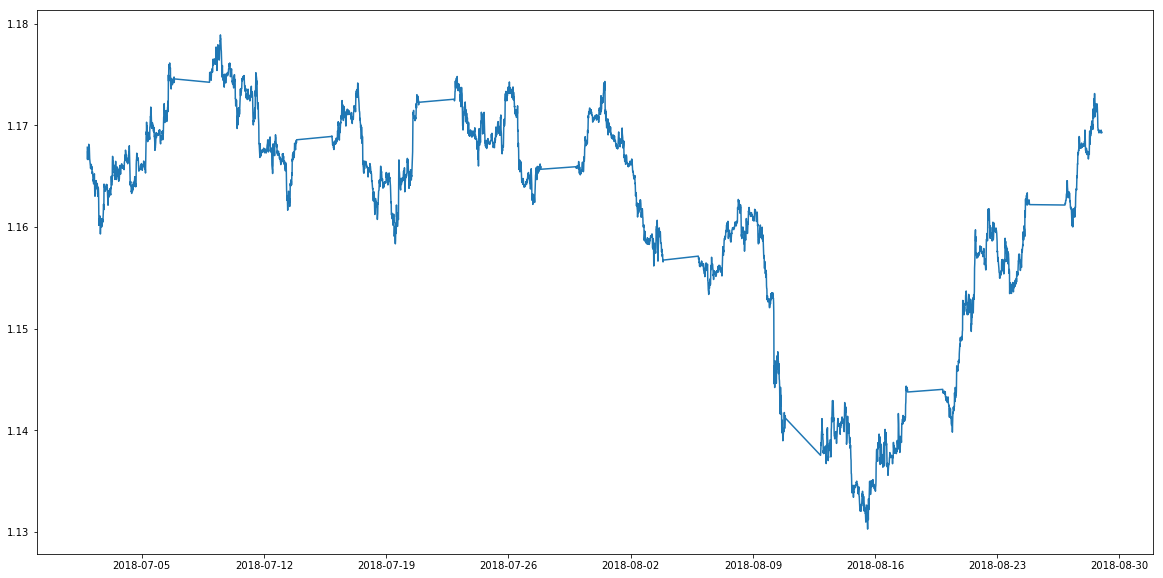

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df['mid.c'])